## Artficial Neural Network (ANN)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Constants
image_size = 224
batch_size = 32
train_data_dir = 'D:/Project/Project/train'
test_data_dir = 'D:/Project/Project/test'


# Data preprocessing (without augmentation)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load and preprocess train and test images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

# Calculate input size
input_shape = (image_size, image_size, 3)
input_size = input_shape[0] * input_shape[1] * input_shape[2]

# Build the model
model = Sequential([
    Flatten(input_shape=input_shape),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Found 1720 images belonging to 2 classes.
Found 629 images belonging to 2 classes.


C:\Users\radwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


C:\Users\radwa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


53/53 ━━━━━━━━━━━━━━━━━━━━ 43s 745ms/step - accuracy: 0.5165 - loss: 60.2587 - val_accuracy: 0.7862 - val_loss: 1.9902
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4688 - loss: 11.6175 - val_accuracy: 0.6190 - val_loss: 1.9508
Epoch 3/10


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2288.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 584ms/step - accuracy: 0.5537 - loss: 8.1057 - val_accuracy: 0.7681 - val_loss: 0.6309
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5938 - loss: 0.5143 - val_accuracy: 0.7143 - val_loss: 0.3234
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 600ms/step - accuracy: 0.5475 - loss: 0.7329 - val_accuracy: 0.7730 - val_loss: 0.6322
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.5938 - loss: 0.3431 - val_accuracy: 0.6667 - val_loss: 0.3330
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 31s 585ms/step - accuracy: 0.5627 - loss: 0.6934 - val_accuracy: 0.7697 - val_loss: 0.6349
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4688 - loss: 0.3605 - val_accuracy: 0.7619 - val_loss: 0.3196
Epoch 9/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 603ms/step - accuracy: 0.5784 - loss: 0.6824 - val_accuracy: 0.7714 - val_loss: 0.6349
Epoch 10/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6562 - loss: 0.3386 - val_accuracy: 0.6667 - val_l

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,608,072 (883.51 MB)

 Trainable params: 77,202,690 (294.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 154,405,382 (589.01 MB)

In [4]:
# Save the model
model.save('ann_model.h5')

In [5]:
# Load the saved model
from tensorflow.keras.models import load_model

# Load the model
model = load_model('ann_model.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.7660 - loss: 0.6359 
Test Loss: 0.6355564594268799
Test Accuracy: 0.7678855061531067


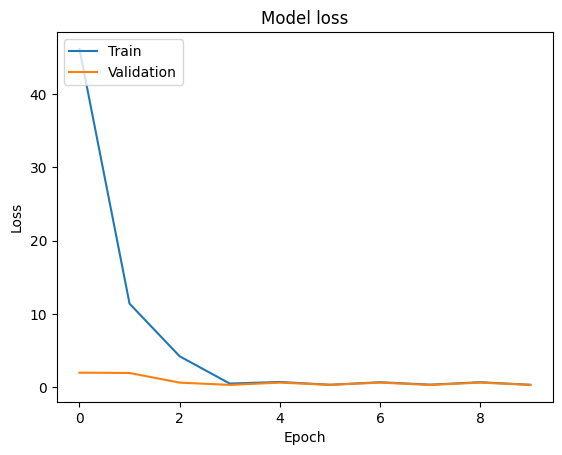

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Success Rate Calculation

In [7]:
correct_identifications_object1 = 0
correct_identifications_object2 = 0

for i in range(len(test_generator)):
    batch_images, batch_labels = test_generator[i]
    predictions = model.predict(batch_images)
    for j in range(len(batch_labels)):
        if batch_labels[j][0] == 1 and predictions[j][0] >= 0.5:
            correct_identifications_object1 += 1
        elif batch_labels[j][1] == 1 and predictions[j][1] >= 0.5:
            correct_identifications_object2 += 1

# Calculate success rate using the provided law
success_rate = (correct_identifications_object1 + correct_identifications_object2) / 20

print("Success Rate:", success_rate)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Success Rate: 24.15


## Testing Using Unseen Image. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted class: banana


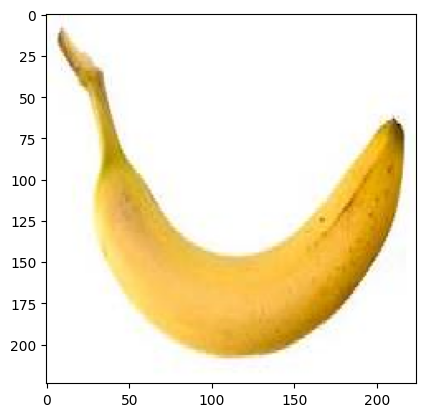

In [32]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Choose the path to the image you want to test (replace 'path_to_image.jpg' with the actual path)
image_path = "D:\Project\Project\Banana_img_for_test.jpeg"

# Load and preprocess the image
img = image.load_img(image_path, target_size=(image_size, image_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the pixel values

# Make predictions
predictions = model.predict(img_array)

# Decode the predictions
predicted_class = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_label = [k for k, v in class_labels.items() if v == predicted_class][0]

print(f"Predicted class: {predicted_label}")
plt.imshow(img)
